Notebook for various spectra visualization methods
Will work against persisted data here, but methods should work in other contexts

In [1]:
#imports and env
import numpy as np
import pickle
from matplotlib import pyplot as plt
from pathlib import Path
#update path to use our packages
sys.path.insert(0, os.path.abspath('..'))
from libs_unet.training.spec_maker import spectrum_maker
#define absolute path to repo top level and then relative vs. that
top_dir = Path.cwd().parent #working directory for notebook should be location of notebook
datapath = top_dir / 'data'

In [2]:
#should recover the same Li2CO3 spectrum here as we get from the NIST LIBS website
fracs_dict = {'Li':0.33, 'C':0.17, 'O':0.5}
my_maker = spectrum_maker()
wave, spec_dict, lines_dict = my_maker.make_spectra(fracs_dict)

In [10]:
#import the expermental libs spectra from LBNL
libs_spec = np.genfromtxt(datapath / "experimental/LIBS_Li2CO3.csv", delimiter=',', skip_header=1)
#transform to 1nm resolution for consistent scaling
#resample to our model specs for wavelength resolution
libs_wave = libs_spec[:,0]
libs_intens = libs_spec[:,1]
#Convert input data to model format if needed
wave_dict = {wl:0 for wl in wave}
for i in range(len(libs_wave)):
    int_wl = np.round(libs_wave[i],0)
    if int_wl in wave_dict:
        wave_dict[int_wl] += libs_intens[i]
x_spec = np.array([])
for wl, intens in wave_dict.items():
    x_spec = np.append(x_spec, intens)
#determine multiplier to scale 671 peak to 10,000
sciapp_mult = 1e4 / x_spec[671 - np.min(wave)] #0.0689
x_spec = sciapp_mult * x_spec

In [13]:
#location of max Li peak on simulated
wave[np.argmax(lines_dict['Li'])] #671 nm
lines_dict['Li'][np.argmax(lines_dict['Li'])] #41005.8, line height > voigt max?
np.argmax(spec_dict['comp']) + 180 #671
nist_mult = 10000 / np.max(spec_dict['comp'])
nist_mult #1.1682

1.1682465089906855

<function matplotlib.pyplot.show(close=None, block=None)>

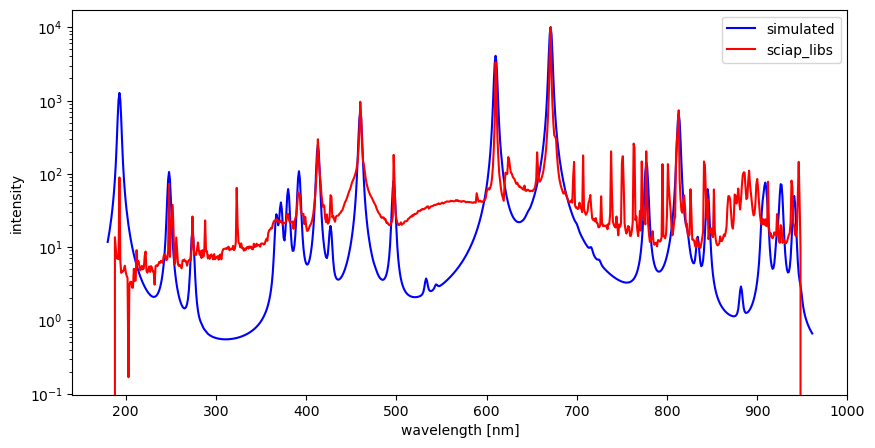

In [14]:
#Look at an apples to apples scaling
nist_spec = nist_mult * spec_dict['comp']

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(wave, nist_spec, color='blue', label='simulated') 
plt.plot(wave,x_spec, color='red', label='sciap_libs')
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity')
plt.yscale('log')
plt.legend()
plt.show

In [16]:
#Read in the nist website libs data for Li2CO3 for comparison too
nist_libs = np.genfromtxt(datapath / "nist_libs/Li2CO3_nist_libs.csv", delimiter=',', skip_header=1, filling_values=0)
nist_libs = nist_libs[:,0:2]
nist_libs.shape
#max peak
nist_libs[:,0][np.argmax(nist_libs[:,1])] #670.81
nist_scale =  10000 / np.max(nist_libs[:,1])
#note we aren't resampling to get a reusable scaling parameter here
nist_scaled = nist_libs[:,1] * nist_scale

<function matplotlib.pyplot.show(close=None, block=None)>

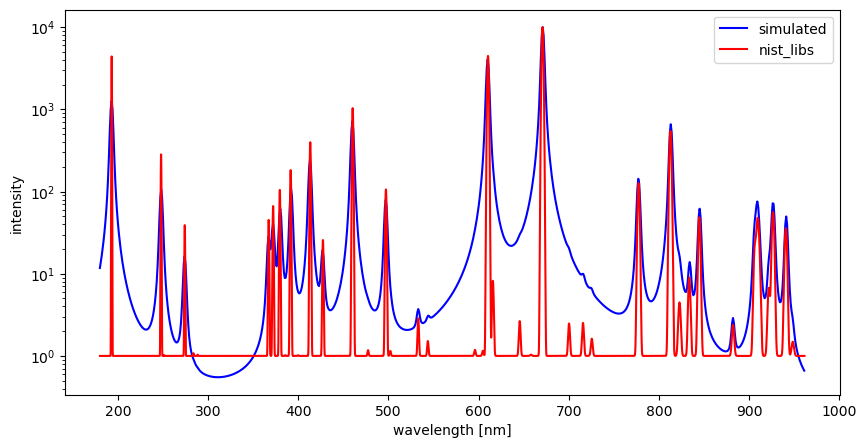

In [17]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(wave, nist_spec, color='blue', label='simulated') 
plt.plot(nist_libs[:,0],nist_scaled +1, color='red', label='nist_libs')
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity')
#plt.xlim([190, 950]) #note data may go beyond this range
plt.yscale('log')
plt.legend()
plt.show

In [18]:
#compare the sum of lines coming back to the nist lines for Li2CO3. Should be same
nist_lines = np.genfromtxt(datapath / "nist_libs/Li2CO3_nist_lines.csv", delimiter=',', skip_header=1, filling_values=0)

In [19]:
#aggregate all the intensities to a single sum for each wavelength
line_wl = np.round(nist_lines[:,0]).astype('int')
line_int = np.sum(nist_lines[:,1:], axis=1)
nist_int = np.zeros(len(wave))
for i in range(len(line_wl)):
    nist_int[line_wl[i]-180] += line_int[i]

In [20]:
np.max(lines_dict['comp'] - nist_int) #2.610000002601737 very close!

2.610000002601737

In [21]:
#create arbitrary spectra from simulation
fracs_dict = {'Sn':0.9, 'Pr':0.1}
wave, spec_dict, lines_dict = my_maker.make_spectra(fracs_dict)

<function matplotlib.pyplot.show(close=None, block=None)>

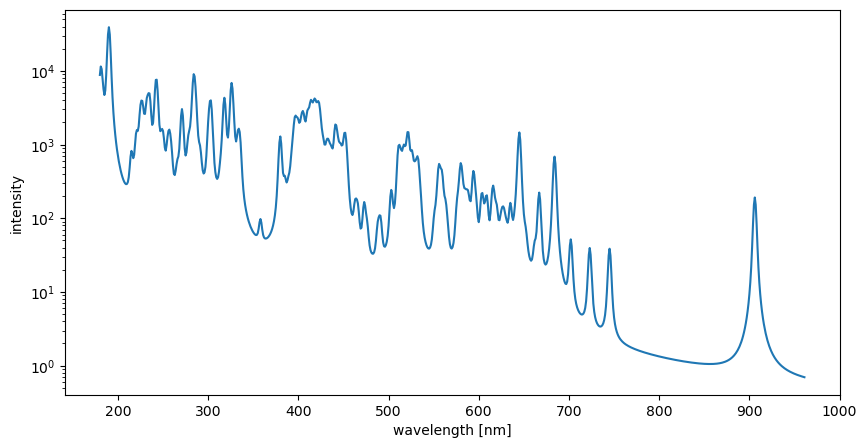

In [22]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(wave, spec_dict['comp']) 
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity')
plt.yscale('log')
#plt.legend()
plt.show